<a href="https://colab.research.google.com/github/Tanuja651/DataMiningUsingPython/blob/main/FINAL_DATA_MINING_USING_PYTHON_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre Processing
Data preprocessing is an important step in the data mining process. It refers to the cleaning, transforming, and integrating of data in order to make it ready for analysis. The goal of data preprocessing is to improve the quality of the data and to make it more suitable for the specific data mining task.
  

## Data Cleaning
This involves identifying and correcting errors or inconsistencies in the data, such as missing values, outliers, and duplicates. Various techniques can be used for data cleaning.

         

### Handling missing values

  **Missing Data**: This situation arises when some data is missing in the data. It can be handled in various ways.
  Some of them are:

- **Dropping rows and columns**: This step involves removing unnecessary or unwanted rows or columns from a dataset. For example, if some data is irrelevant or incomplete, you can delete it to focus on important information.
  
- **Checking for duplicates**: This step involves looking for and identifying any repeated or identical data entries in the dataset.

- **Estimate missing values using mean, mode, or median**: Sometimes, datasets have missing values. To handle this, we can fill in those gaps by using statistics:
  - **Mean**: The average of the data.
  - **Mode**: The most frequent value in the data.
  - **Median**: The middle value when the data is sorted.
These methods help estimate and replace missing values to ensure a complete dataset.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Let's simulate missing values for demonstration by introducing NaNs
df.iloc[0, 0] = None  # Add a NaN value at the first row, first column
df.iloc[50, 1] = None  # Add a NaN value at the 51st row, second column
df.iloc[100, 2] = None  # Add a NaN value at the 101st row, third column

# 1. isnull() - Check for missing values (NaN)
print("isnull() - Missing values (NaN):\n", df.isnull().sum())

# 2. notnull() - Check for non-missing values
print("\nnotnull() - Non-missing values:\n", df.notnull().sum())

# 3. info() - Provides a summary including the count of non-null entries
print("\ninfo() - DataFrame info (non-null count and datatype):")
df.info()

# 4. isna() - Check for missing values (alternative to isnull())
print("\nisna() - Missing values (NaN):\n", df.isna().sum())

# 5. dropna() - Drop rows with any missing values (NaN)
df_dropped = df.dropna()
print("\ndropna() - DataFrame after dropping rows with missing values:")
print(df_dropped.head())

# 6. fillna() - Fill missing values with a specified value (e.g., 0)
df_filled = df.fillna(0)
print("\nfillna() - DataFrame after filling missing values with 0:")
print(df_filled.head())

# 7. replace() - Replace NaN with a specified value (e.g., 1)
df_replaced = df.replace({None: 1})
print("\nreplace() - DataFrame after replacing NaN with 1:")
print(df_replaced.head())

# 8. drop_duplicates() - Drop duplicate rows
df_duplicates_dropped = df.drop_duplicates()
print("\ndrop_duplicates() - DataFrame after dropping duplicate rows:")
print(df_duplicates_dropped.head())

# 9. unique() - Get unique values from a specific column (e.g., the first feature 'sepal length (cm)')
print("\nunique() - Unique values in the 'sepal length (cm)' column:")
print(df['sepal length (cm)'].unique())

# 10. Filling missing values with the mean
df_mean_filled = df.fillna(df.mean())
print("\nFilling missing values with the mean:\n", df_mean_filled.head())

# 11. Filling missing values with the mode
df_mode_filled = df.fillna(df.mode().iloc[0])
print("\nFilling missing values with the mode:\n", df_mode_filled.head())

# 12. Filling missing values with the median
df_median_filled = df.fillna(df.median())
print("\nFilling missing values with the median:\n", df_median_filled.head())

isnull() - Missing values (NaN):
 sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    1
petal width (cm)     0
dtype: int64

notnull() - Non-missing values:
 sepal length (cm)    149
sepal width (cm)     149
petal length (cm)    149
petal width (cm)     150
dtype: int64

info() - DataFrame info (non-null count and datatype):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB

isna() - Missing values (NaN):
 sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    1
petal width (cm)     0
dtype: int64

dropna() - DataFrame after dropping rows with missing values:
   sepal length (cm)  sep

### Noisy Data
**Noisy Data:** Noisy data is a meaningless data that can’t be interpreted by machines.It can be generated due to faulty data collection, data entry errors etc. It can be handled in following ways :
- **Binning Method:**This method works on sorted data in order to smooth it. The whole data is divided into segments of equal size and then various methods are performed to complete the task. Each segmented is handled separately. One can replace all data in a segment by its mean or boundary values can be used to complete the task.

    - **Equal Frequency Binning**: bins have an equal frequency.
    - **Equal Width Binning** : bins have equal width with a range of each bin are defined as [min + w], [min + 2w] …. [min + nw] where w = (max – min) / (no of bins).
- **Regression**:Here data can be made smooth by fitting it to a regression function.The regression used may be linear (having one independent variable) or multiple (having multiple independent variables).
- **Clustering**: This approach groups the similar data in a cluster. The outliers may be undetected or it will fall outside the clusters.
  

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Equal-width binning
equal_width_bins = pd.cut(df['sepal length (cm)'], bins=3, labels=False)
print("\nEqual-width binning:\n", equal_width_bins.head())
print("Equal-width bin edges:\n", pd.cut(df['sepal length (cm)'], bins=3).cat.categories)

# Equal-depth binning
equal_depth_bins = pd.qcut(df['sepal length (cm)'], q=3, labels=False)
print("\nEqual-depth binning:\n", equal_depth_bins.head())
print("Equal-depth bin edges:\n", pd.qcut(df['sepal length (cm)'], q=3).cat.categories)



Equal-width binning:
 0    0
1    0
2    0
3    0
4    0
Name: sepal length (cm), dtype: int64
Equal-width bin edges:
 IntervalIndex([(4.296, 5.5], (5.5, 6.7], (6.7, 7.9]], dtype='interval[float64, right]')

Equal-depth binning:
 0    0
1    0
2    0
3    0
4    0
Name: sepal length (cm), dtype: int64
Equal-depth bin edges:
 IntervalIndex([(4.2989999999999995, 5.4], (5.4, 6.3], (6.3, 7.9]], dtype='interval[float64, right]')


 ## Data Transformation
This step is taken in order to transform the data in appropriate forms suitable for mining process.

### Normalization
It is done in order to scale the data values in a specified range (-1.0 to 1.0 or 0.0 to 1.0)
- **Min-Max normalization**: This technique scales the values of a feature to a range between 0 and 1. This is done by subtracting the minimum value of the feature from each value, and then dividing by the range of the feature.
- **Z-score normalization**: This technique scales the values of a feature to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the feature from each value, and then dividing by the standard deviation.
- **Decimal Scaling:** This technique scales the values of a feature by dividing the values of a feature by a power of 10.

               

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 1. Min-Max Normalization
min_max_normalized = (df - df.min()) / (df.max() - df.min())
print("Min-Max Normalization:\n", min_max_normalized.head())

# 2. Z-Score Normalization
z_score_normalized = (df - df.mean()) / df.std()
print("\nZ-Score Normalization:\n", z_score_normalized.head())

# 3. Decimal Scaling
scaling_factor = 10 ** np.ceil(np.log10(df.abs().max()))
decimal_scaled = df / scaling_factor
print("\nDecimal Scaling:\n", decimal_scaled.head())


Min-Max Normalization:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667

Z-Score Normalization:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.897674          1.015602          -1.335752         -1.311052
1          -1.139200         -0.131539          -1.335752         -1.311052
2          -1.380727          0.327318          -1.392399         -1.311052
3          -1.501490          0.097889          -1.279104         -1.311052
4          -1.018437          1.245030          -1.335752         -1.311052

Decimal Scaling:
    sepal length (cm)

### Discretization
This is done to replace the raw values of numeric attribute by interval levels or conceptual levels.
- **Discretization by Binning**: Divides continuous data into intervals or bins to convert it into categorical data for easier analysis.

- **Discretization by Cluster**: Groups data into clusters based on similarities, then assigns each cluster a distinct category for simplification.

- **Discretization by Histogram**: Uses histograms to divide continuous data into bins based on frequency distribution for easier analysis and categorization.
               

Binning Discretization:
 0    Low
1    Low
2    Low
3    Low
4    Low
Name: sepal length (cm), dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

Clustering Discretization:
 [2 2 2 2 2]

Histogram Discretization:
 0    Low
1    Low
2    Low
3    Low
4    Low
Name: sepal length (cm), dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


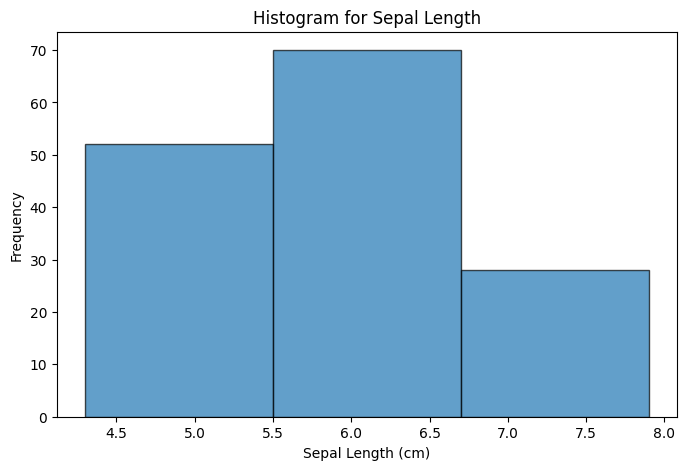

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Feature to discretize
data = df['sepal length (cm)']

# 1. Discretization by Binning
binned_data = pd.cut(data, bins=3, labels=["Low", "Medium", "High"])
print("Binning Discretization:\n", binned_data.head())

# 2. Discretization by Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clustered_data = kmeans.fit_predict(data.values.reshape(-1, 1))
print("\nClustering Discretization:\n", clustered_data[:5])

# 3. Discretization by Histogram
hist_bins = np.histogram(data, bins=3)[1]  # Get bin edges
hist_data = pd.cut(data, bins=hist_bins, labels=["Low", "Medium", "High"], include_lowest=True)
print("\nHistogram Discretization:\n", hist_data.head())

# Plot Histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=3, edgecolor='black', alpha=0.7)
plt.title('Histogram for Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


 ### Aggregation
**Aggregation** in data mining refers to the process of combining multiple pieces of data to provide a summary or simplified view of the dataset. This is done by applying specific functions (like sum, mean, min, max, etc.) to groups of data, which helps in analyzing large datasets by reducing complexity and highlighting important patterns or trends. Essentially, aggregation helps in summarizing data for easier interpretation and decision-making.

- **Sum**: Adds up all the values in a dataset to find the total.

- **Min**: Finds the smallest value in a dataset.

- **Max**: Finds the largest value in a dataset.

- **Median**: The middle value when data is sorted in ascending or descending order.

- **Mean**: The average of all values in a dataset, calculated by dividing the sum by the number of values.
               

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Aggregation operations
sum_values = df.sum()
min_values = df.min()
max_values = df.max()
median_values = df.median()
mean_values = df.mean()

# Display the results
print("Sum of each feature:\n", sum_values)
print("\nMin of each feature:\n", min_values)
print("\nMax of each feature:\n", max_values)
print("\nMedian of each feature:\n", median_values)
print("\nMean of each feature:\n", mean_values)


Sum of each feature:
 sepal length (cm)    876.5
sepal width (cm)     458.6
petal length (cm)    563.7
petal width (cm)     179.9
dtype: float64

Min of each feature:
 sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

Max of each feature:
 sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

Median of each feature:
 sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

Mean of each feature:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


 ### Smoothing
**Smoothing** is a data preprocessing technique used to reduce noise and inconsistencies in a dataset, making the underlying patterns or trends more visible. It works by adjusting or averaging out extreme values (outliers) or fluctuations in data to provide a clearer, more consistent view.

In data mining, smoothing is often applied to continuous data to simplify analysis. There are different methods of smoothing, such as using the mean, median, or boundary values within specific intervals or bins. The goal is to create a more stable dataset for better pattern recognition and decision-making.

- **Smoothing by Bin Means**: This method smooths data by replacing each data point in a bin with the average (mean) of all the values in that bin, reducing noise and making trends clearer.

- **Smoothing by Bin Median**: Similar to bin means, but instead of using the average, each data point is replaced with the median of values within the bin. The median is less affected by outliers.

- **Smoothing by Bin Boundary**: This method smooths data by replacing each data point in a bin with the boundary value of the bin, which can help preserve the structure and avoid overly influencing the data with extreme values.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Feature to smooth
data = df['sepal length (cm)']

# 1. Smoothing by Bin Means
# Bin the data into 3 equal-width bins and replace each value with the bin mean
bin_means = pd.cut(data, bins=3, labels=False)
bin_mean_values = data.groupby(bin_means).mean()
smoothed_by_bin_mean = bin_means.map(bin_mean_values)
print("Smoothing by Bin Means:\n", smoothed_by_bin_mean.head())

# 2. Smoothing by Bin Median
# Bin the data into 3 equal-width bins and replace each value with the bin median
bin_median_values = data.groupby(bin_means).median()
smoothed_by_bin_median = bin_means.map(bin_median_values)
print("\nSmoothing by Bin Median:\n", smoothed_by_bin_median.head())

# 3. Smoothing by Bin Boundary
# Bin the data into 3 equal-width bins and replace each value with the bin boundary (lower boundary)
bin_boundaries = pd.cut(data, bins=3, labels=False).apply(lambda x: pd.cut(data, bins=3).cat.categories.left[x])
print("\nSmoothing by Bin Boundary:\n", bin_boundaries.head())


Smoothing by Bin Means:
 0    5.018644
1    5.018644
2    5.018644
3    5.018644
4    5.018644
Name: sepal length (cm), dtype: float64

Smoothing by Bin Median:
 0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: sepal length (cm), dtype: float64

Smoothing by Bin Boundary:
 0    4.296
1    4.296
2    4.296
3    4.296
4    4.296
Name: sepal length (cm), dtype: float64


# Data Visualization
**Data visualization** is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

- **Bar Chart**  
A bar chart uses rectangular bars to represent data values. The length of each bar is proportional to the value it represents. It's commonly used to compare different categories or groups.

-  **Line Chart**  
A line chart displays data points connected by straight lines. It's typically used to show trends or changes over time, making it useful for time-series data.

-  **Pie Chart**  
A pie chart divides a circle into slices, where each slice represents a proportion of the whole. It's used to show relative percentages or parts of a total.

-  **Scatter Plot**  
A scatter plot displays data points on a two-dimensional graph. Each point represents an individual data entry, with its position determined by two variables. It's useful for showing relationships or correlations between two variables.

-  **Histogram**  
A histogram is similar to a bar chart but is used to represent the distribution of numerical data. It groups data into bins or intervals and shows the frequency of data points in each bin.

-  **Heat Map**  
A heat map uses color gradients to represent data values in a matrix. The intensity of the color corresponds to the value, making it useful for visualizing patterns, correlations, or trends in large datasets.

-  **Box Plot**  
A box plot (or box-and-whisker plot) displays the distribution of a dataset. It shows the median, quartiles, and potential outliers, helping to visualize the spread and symmetry of the data.

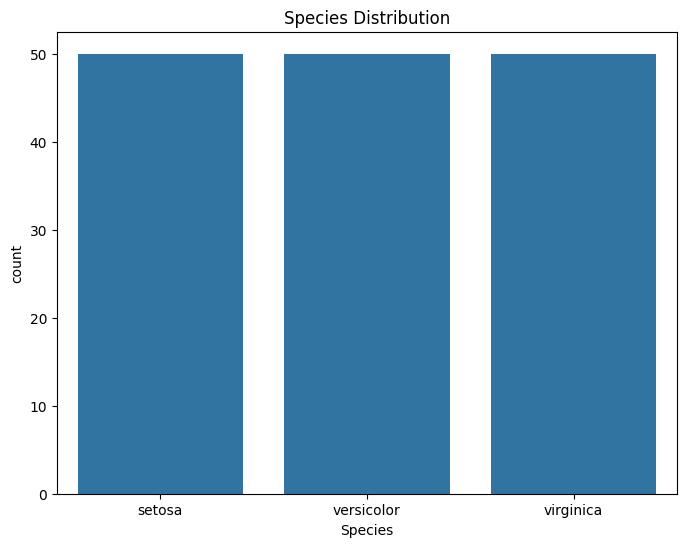

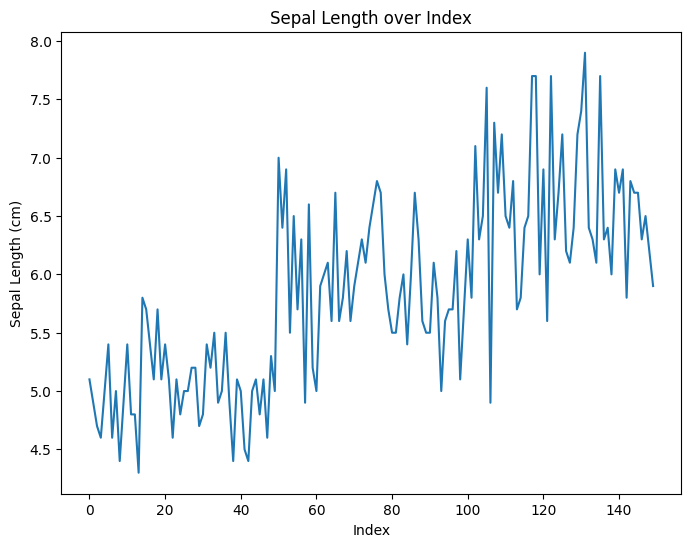

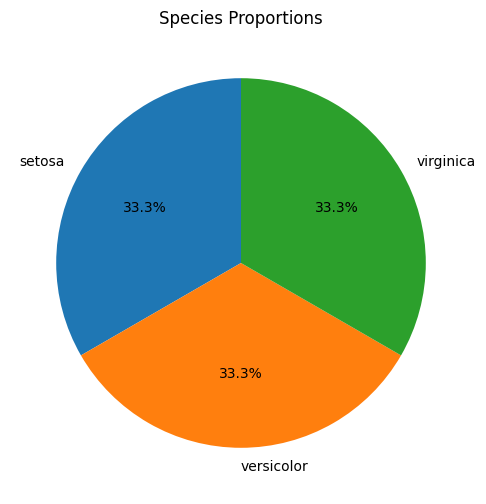

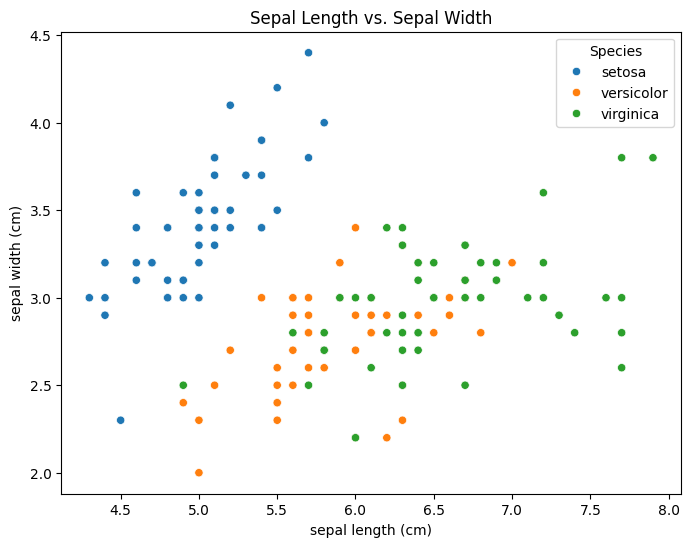

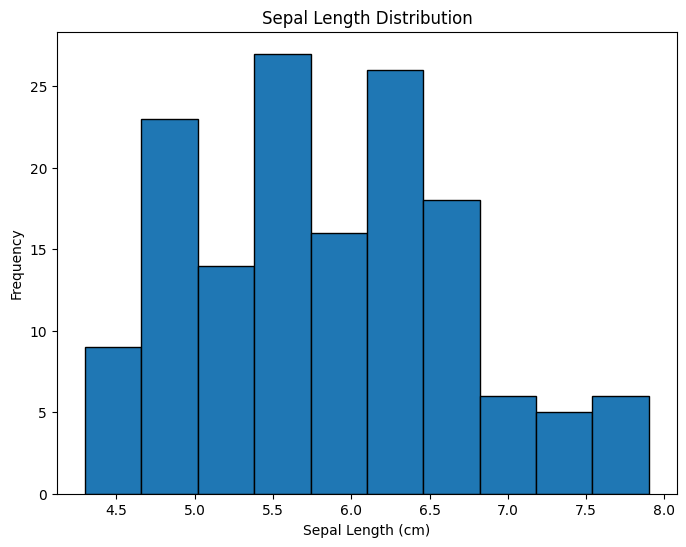

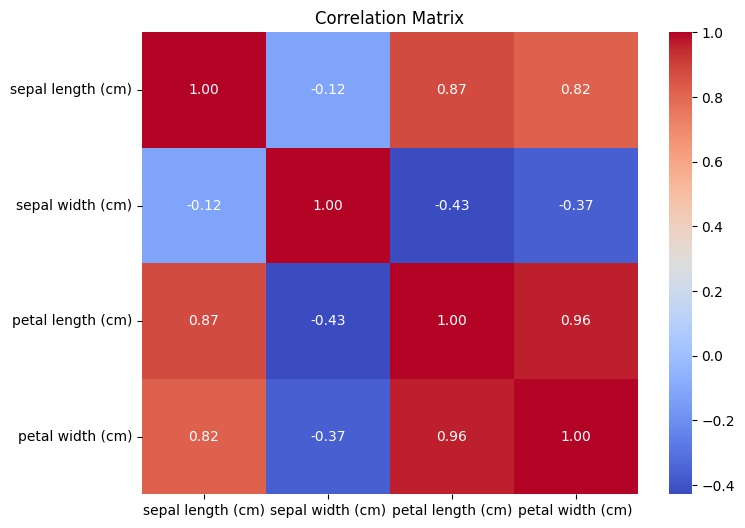

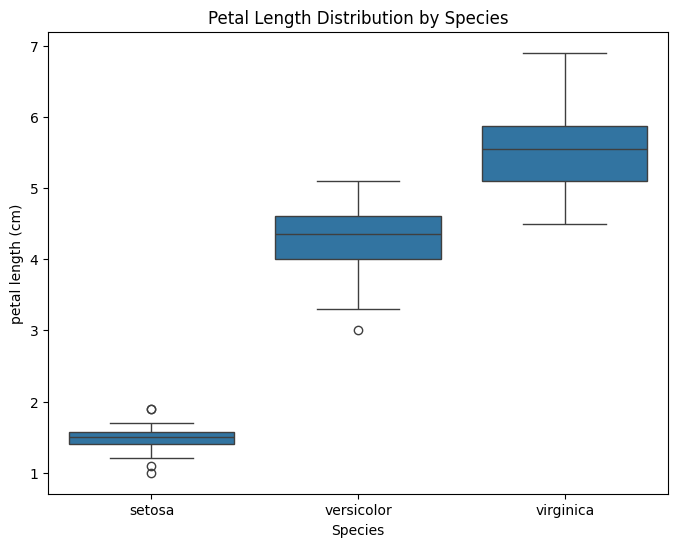

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 1. Bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=df)
plt.title('Species Distribution')
plt.show()

# 2. Line chart (Sepal Length over index)
plt.figure(figsize=(8, 6))
plt.plot(df.index, df['sepal length (cm)'])
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length over Index')
plt.show()

# 3. Pie chart (Species Proportions)
species_counts = df['Species'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Species Proportions')
plt.show()

# 4. Scatter plot (Sepal Length vs. Sepal Width)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='Species', data=df)
plt.title('Sepal Length vs. Sepal Width')
plt.show()

# 5. Histogram (Sepal Length Distribution)
plt.figure(figsize=(8, 6))
plt.hist(df['sepal length (cm)'], bins=10, edgecolor='black')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Sepal Length Distribution')
plt.show()

# 6. Heatmap (Correlation Matrix)
corr_matrix = df.drop(columns=['Species']).corr() # Drop the 'Species' column before calculating correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 7. Boxplot (Petal Length by Species)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='petal length (cm)', data=df)
plt.title('Petal Length Distribution by Species')
plt.show()


# Dimensionality Reduction
### **Dimensionality Reduction**
Dimensionality reduction is a technique used to reduce the number of features (or variables) in a dataset while preserving as much of the important information as possible. It helps in simplifying models, reducing computational cost, and improving performance, especially when dealing with high-dimensional data (datasets with many features). The goal is to make the data easier to visualize, analyze, and process without losing critical information.

- **PCA (Principal Component Analysis)**
PCA is a popular technique for dimensionality reduction. It transforms the data into a new coordinate system, where the axes (called principal components) are ordered by the amount of variance in the data they explain. The first principal component explains the most variance, the second explains the next largest amount, and so on. By selecting the top few principal components, you can reduce the dimensions of the dataset while retaining most of its important information. PCA is mainly used when you want to preserve the most significant features of the data while reducing noise.

- **LDA (Linear Discriminant Analysis)**
LDA is another dimensionality reduction technique, but it is supervised, meaning it uses class labels in the data. The goal of LDA is to find the feature space that best separates different classes in the dataset. It works by maximizing the distance between the means of different classes while minimizing the variance within each class. Unlike PCA, which is focused on variance in the data, LDA aims to improve class separability, making it especially useful for classification tasks. LDA is often used when you need to reduce dimensions in a way that enhances class discrimination.

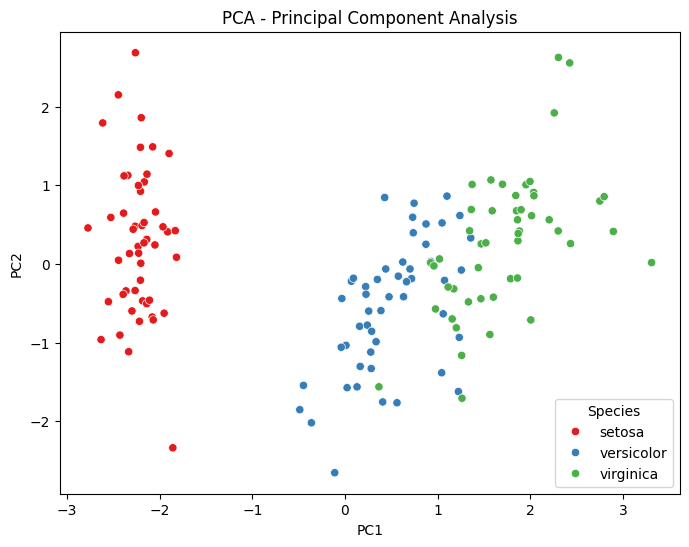

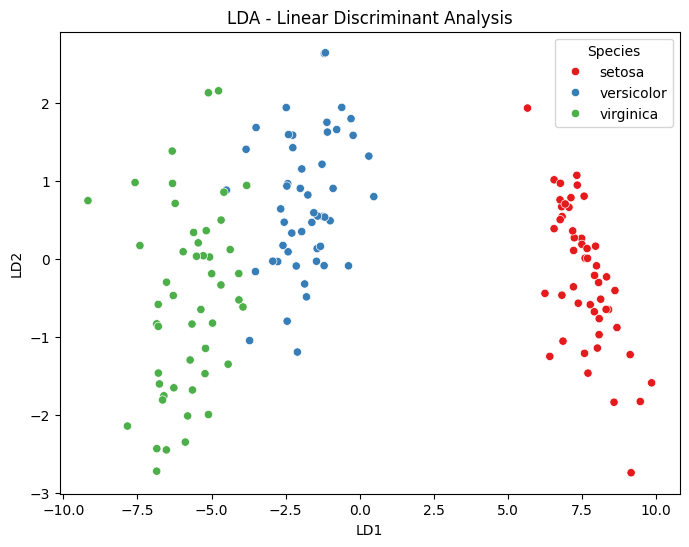

Explained variance ratio by PCA components: [0.72962445 0.22850762]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Standardize the data
scaled_data = StandardScaler().fit_transform(df.drop('Species', axis=1))

# PCA - Principal Component Analysis
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Species'] = df['Species']

# LDA - Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda_components = lda.fit_transform(df.drop('Species', axis=1), df['Species'])
lda_df = pd.DataFrame(lda_components, columns=['LD1', 'LD2'])
lda_df['Species'] = df['Species']

# Plot PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=pca_df, palette="Set1")
plt.title('PCA - Principal Component Analysis')
plt.show()

# Plot LDA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LD1', y='LD2', hue='Species', data=lda_df, palette="Set1")
plt.title('LDA - Linear Discriminant Analysis')
plt.show()

# Explained variance for PCA
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")


# Classification
### **Classification**
Classification is a type of supervised learning in data mining and machine learning where the goal is to predict the category or class of a given data point based on its features. In classification, the algorithm learns from labeled data (data with known outcomes) and is trained to recognize patterns or relationships between the input features and the class labels. After training, the model can predict the class labels of new, unseen data.

- **Logistic Regression**
Logistic Regression is a statistical model used for binary classification, where the goal is to predict one of two possible outcomes (e.g., yes/no, true/false). Despite its name, it’s a classification algorithm, not a regression model. It works by estimating the probability that a given input belongs to a particular class using a logistic function (sigmoid function), which outputs values between 0 and 1. If the probability is greater than 0.5, the model predicts one class; otherwise, it predicts the other class.

-  **Naive Bayes Classifier**
The Naive Bayes classifier is based on Bayes' Theorem and assumes that the features used for classification are independent of each other (this is the "naive" assumption). It is a probabilistic classifier that calculates the probability of a data point belonging to each class, and then assigns it to the class with the highest probability. Naive Bayes is particularly effective in cases with a large number of features and is widely used for text classification, such as spam detection.

-  **K-Nearest Neighbour (KNN)**
K-Nearest Neighbour (KNN) is a simple, instance-based learning algorithm used for both classification and regression. For classification, it works by finding the "k" nearest data points (neighbors) to a given data point in the feature space, and then assigning the most common class among those neighbors. The "k" value is a user-defined parameter. KNN is non-parametric, meaning it makes no assumptions about the underlying data distribution, and it’s easy to understand and implement. However, it can be computationally expensive, especially with large datasets.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Prepare data (features and target)
X = df.drop('Species', axis=1)
y = df['Species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, log_reg_pred))

# 2. Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("Naive Bayes Accuracy: ", accuracy_score(y_test, nb_pred))

# 3. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("K-Nearest Neighbors Accuracy: ", accuracy_score(y_test, knn_pred))


Logistic Regression Accuracy:  1.0
Naive Bayes Accuracy:  0.9777777777777777
K-Nearest Neighbors Accuracy:  1.0


# Clustering
### **Clustering**
Clustering is an unsupervised learning technique used to group similar data points together. The goal of clustering is to find inherent structures in data by grouping points that are more similar to each other than to those in other groups. These groups are called clusters. Clustering is often used in exploratory data analysis, pattern recognition, and market segmentation.

-  **K-Means Clustering**
K-Means clustering is one of the most popular clustering algorithms. It divides a dataset into **k** clusters by assigning each data point to the nearest cluster centroid (the center of the cluster). The algorithm then recalculates the centroids based on the current cluster assignments and repeats the process until the centroids stabilize or the algorithm converges. The number of clusters, **k**, must be specified beforehand. K-Means is efficient and works well for spherical clusters, but it may not perform well with clusters of irregular shapes or when the clusters have varying sizes.

-  **Agglomerative Hierarchical Clustering**
Agglomerative Hierarchical Clustering is a bottom-up approach to clustering. It starts by treating each data point as a single cluster and then iteratively merges the two closest clusters based on a distance measure (e.g., Euclidean distance). This process continues until all data points are part of one single cluster or a desired number of clusters is reached. The result of hierarchical clustering is typically represented as a **dendrogram**, a tree-like diagram showing the arrangement of clusters and their hierarchical relationships.

-  **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
DBSCAN is a density-based clustering algorithm that groups together closely packed points and marks points in low-density regions as outliers (noise). Unlike K-Means, DBSCAN does not require the number of clusters to be specified in advance. It works by defining a neighborhood around each point (using a distance threshold), and if the point has enough neighbors within this neighborhood, it is included in a cluster. DBSCAN is particularly good at handling clusters of arbitrary shapes and can also detect noise points that do not belong to any cluster. However, it may struggle with clusters of varying densities.

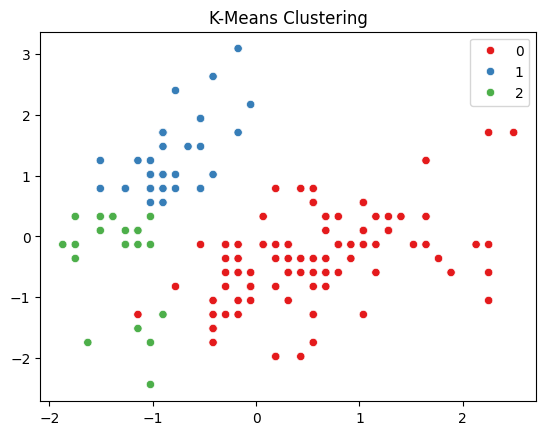

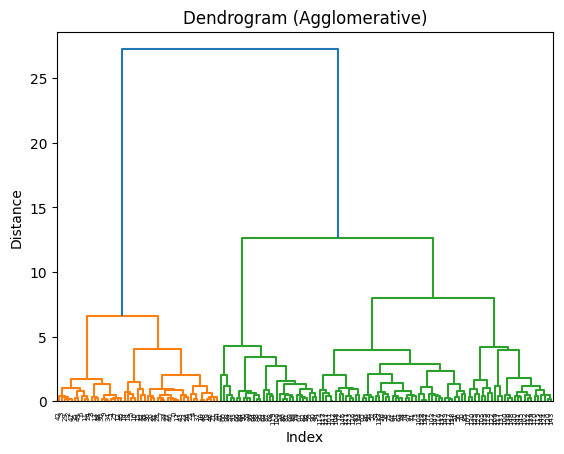

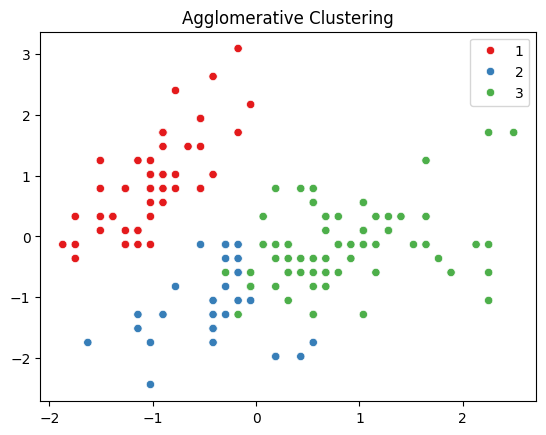

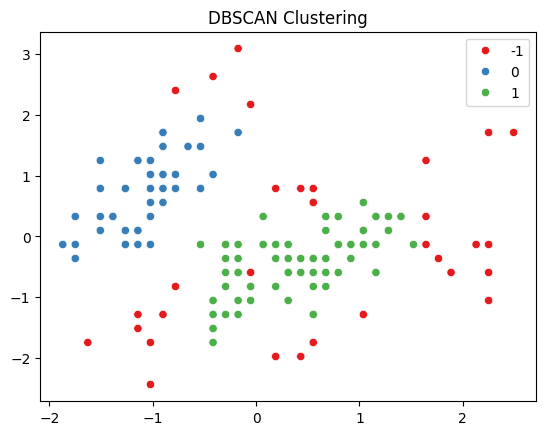

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Load and prepare dataset
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)

# K-Means Clustering
kmeans_labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans_labels, palette="Set1")
plt.title('K-Means Clustering')
plt.show()

# Hierarchical Clustering (Agglomerative)
Z = linkage(X, method='ward')
dendrogram(Z)
plt.title('Dendrogram (Agglomerative)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

agglo_labels = fcluster(Z, t=3, criterion='maxclust')
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=agglo_labels, palette="Set1")
plt.title('Agglomerative Clustering')
plt.show()

# DBSCAN Clustering
dbscan_labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan_labels, palette="Set1")
plt.title('DBSCAN Clustering')
plt.show()


# Association Rule Extraction
### **Association Rule Extraction**
Association rule extraction is a technique used to discover interesting relationships or patterns among items in large datasets. This is commonly used in market basket analysis, where the goal is to identify items that frequently co-occur in transactions. The rules are expressed in the form of "If X, then Y," where X and Y are itemsets, and the goal is to find associations with strong support, confidence, and lift. These rules help businesses and analysts understand product relationships, customer behavior, and market trends.

-  **Apriori Algorithm**

  The **Apriori algorithm** is one of the most popular algorithms for mining frequent itemsets and generating association rules. It works by identifying frequent individual items in the dataset and extending them to larger itemsets. It uses a **bottom-up** approach:
  -  It first scans the dataset to find all frequent itemsets (those that meet a minimum support threshold).
  -  Then, it generates candidate itemsets from the frequent ones, checking their support in the dataset.
  -  The process continues until no more frequent itemsets can be found.

  Apriori uses a **"downward closure property"**, meaning that all non-frequent itemsets will not contain frequent subsets, which helps in pruning the search space efficiently. The key limitations of Apriori are its computational cost and the need to perform multiple scans of the dataset.

-  **FP-Growth Algorithm**
  
  FP-Growth (Frequent Pattern Growth) is an efficient algorithm used to mine frequent itemsets, and it overcomes the limitations of Apriori by not generating candidate itemsets. The algorithm works in two main steps:
  - **Building the FP-tree**: The first step involves scanning the dataset once to create a compact data structure called the **FP-tree** (Frequent Pattern Tree), which stores itemsets in a compressed format.
  - **Mining the FP-tree**: In the second step, the FP-tree is recursively traversed to extract frequent itemsets. The algorithm generates itemsets by dividing the FP-tree into smaller sub-trees and recursively mining them.

  FP-Growth is faster than Apriori because it only requires two scans of the dataset (one to build the FP-tree and another to mine it) and avoids generating candidate itemsets. It is highly scalable and effective for large datasets.

In [ ]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

# Example transactional data (True represents item bought, False represents item not bought)
data = pd.DataFrame({
    'Milk': [True, True, False, True, False],
    'Bread': [True, True, False, True, True],
    'Butter': [False, True, True, True, True],
    'Cheese': [True, False, True, True, True],
})

# Apply Apriori Algorithm
apriori_itemsets = apriori(data, min_support=0.5, use_colnames=True)
apriori_rules = association_rules(apriori_itemsets, metric="lift", min_threshold=1,num_itemsets=2)

# Apply FP-Growth Algorithm
fpgrowth_itemsets = fpgrowth(data, min_support=0.5, use_colnames=True)
fpgrowth_rules = association_rules(fpgrowth_itemsets, metric="lift", min_threshold=1,num_itemsets=2)

# Print Results
print("Apriori Rules:\n", apriori_rules)
print("\nFP-Growth Rules:\n", fpgrowth_rules)


Apriori Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0     (Bread)      (Milk)                 0.8                 0.6      0.6   
1      (Milk)     (Bread)                 0.6                 0.8      0.6   

   confidence  lift  representativity  leverage  conviction  zhangs_metric  \
0        0.75  1.25               1.0      0.12         1.6            1.0   
1        1.00  1.25               1.0      0.12         inf            0.5   

   jaccard  certainty  kulczynski  
0     0.75      0.375       0.875  
1     0.75      1.000       0.875  

FP-Growth Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0     (Bread)      (Milk)                 0.8                 0.6      0.6   
1      (Milk)     (Bread)                 0.6                 0.8      0.6   

   confidence  lift  representativity  leverage  conviction  zhangs_metric  \
0        0.75  1.25               1.0      0.12         1.6            1.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
